Version Date: February 17, 2023

# Part I

# Objectives

- Build regression models that predict the wavelength of maximum absorbance of different cyanine dyes.
- Understand and apply different types of regression models, including simple linear regression, multiple regression, penalized regression, and tree models.
- Use feature selection and the evaluation of feature importance to improve and interpret model performances.
- Use regression model analysis as part of the scientific discovery process by generating hypotheses for factors that affect cyanine dye absorption.
- Gain proficiency in reading and writing Python code in the Google Colab/Jupyter notebook environment

## Getting started

- **If you have limited Google Colab experience,**  you may wish to watch this screencast by watching this [brief (3 minute) screencast](https://www.youtube.com/watch?v=inN8seMm7UI) and/or [reading this (1 page) introductory explanation](https://colab.research.google.com/notebooks/intro.ipynb) which will help you get started by introducing basic concepts and functionalities.

Colab notebooks consist of text cells (like this one) and program code cells, like the ones below. A code cell is evaluated by typing the **Cmd+Enter** keys (or **Shift+Enter**). You can also execute a code cell by mousing over the `[ ]` symbol in the upper left-hand side of the code cell---when you hover over it, it will turn into a "play" button, and clicking the play button will execute the code cell. You can find other options for executing groups of cells in the "Runtime" menu above.

In [ ]:
# This is a code cell

### Basics of Python
Like other programming languages, Python includes libraries, variables and functions.

### Loading Python Libraries

Take a moment to look at this code block:
- `import` loads a module 
- `import ... as` allows you to assign a short alias to the module
- `from ... import` loads a small portion of a module
- observe that the `import`, `as` and `from` keywords are color coded purple.  
- `#` indicates a comment (observe that all of the text following the `#` is color coded green).  This text is not interpreted by the computer, and its goal is to provide the human with some information about what is happening.  

What do each of these program modules do?  You can think of them as being like a library of books that accomplish program tasks.  In general, they can be quite complicated.  In most cases, you will never learn all of the functionality of a module, and will have to use the documentation to help you determine the relevant parts for solving your problem.  It is useful to have a general sense of the types of tasks that each of modules do, so that you can find the appropriate functionality.

- [pandas](http://pandas.pydata.org) is a library for handling datasets
- [numpy](https://numpy.org/) and [scipy](https://www.scipy.org/) are libraries for mathematical and scientific computing
- [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are libraries for data visualization
- [sklearn](https://scikit-learn.org/stable/) is a library for machine learning

In [ ]:
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

#to split train and test dataset
from sklearn.model_selection import train_test_split

# For Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

#to split train and test dataset
from sklearn.model_selection import train_test_split

#for model evaluations
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# for feature selection
from sklearn.feature_selection import SelectKBest, chi2

### Installing RDKit Module
- To look at the molecule structure, we will use the `RDKit` [module](https://www.rdkit.org/)
- The two code blocks below will install RDKit in Google Colab

In [ ]:
# to install rdkit-pypi library which drar the molecular structures
import sys
!time pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

real	0m7.839s
user	0m4.974s
sys	0m0.182s


In [ ]:
# import rdkit modules
try:
  from rdkit import Chem
  from rdkit.Chem import Draw
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

### Variables and Functions

**Variables** are reserved memory locations that store values.  Think of variables like a container that hold data which can be changed later in the program. For example to create a variable named `number` and assign its value as `100`:

```
    number = 100
```

This variable can be modified at any time.
```
    number = 99
    number = 1 
```

The value of `number` has changed to 1.

**Functions** are sets of operations that take an action on some input. Functions are defined using the `def` keyword. Functions only run when they are called, and the names of user-provided input values are called **arguments**.

For example, let's define an `AbsoluteValue` function as below, which takes one argument, the number for which the absolute value should be calculated.
```
def AbsoluteValue(num):
    if num >= 0:
        return num
    else:
        return -num
```
The output of `AbsoluteValue(2)` is `2`, and `AbsoluteValue(-4)` is `4`.

We can also write nested operations such as:
```
np.sqrt(np.exp(abs(np.sin(np.tan(-0.2)))))
```
The output of `np.sqrt(np.exp(abs(np.sin(np.tan(-0.2)))))` is `1.1059`

### Advanced topics

The code below uses some other features of variables in PYTHON.  It is not necessary to review these now, but you may want to refer to this if you need to modify the code.

[Lists](https://developers.google.com/edu/python/lists) can be used to store a series of values. The list is defined by the square brackets, `[]`. Each entry in a [list](https://developers.google.com/edu/python/lists) has an address that can be used to identify it.

In [ ]:
numberList  = [1, 2, -1, 1, -2.2, -42] # here is way to declare a list
print(numberList) # print the list
numberList[4] == -2.2 # square brackets used to access item in a list by index. Indexes start with 0.

[1, 2, -1, 1, -2.2, -42]


True

[Dictionaries](https://developers.google.com/edu/python/dict-files) organize groups of entries in terms of key-value pairs; this is especially useful when there is no numerical ordering implied, but we still want to group data together. The dictionary is defined by the curly brackets, `{}`, and using the sytaxis `key:value`. For example, our keys will be names of fruits in English, and the values are the corresponding names in Spanish:

In [ ]:
translate = {"apple" : "manzana", "orange" : "naranja"} # define a dictionary
translate["apple"] 

'manzana'

We can also access the keys and values arrays by calling the relevant attributes of the dictionary.

In [ ]:
print(translate.keys())
print(translate.values())

dict_keys(['apple', 'orange'])
dict_values(['manzana', 'naranja'])


## Get and Preprocess the Data
Now let's load in the train and test datasets, which are stored on [GitHub](https://docs.github.com/en/get-started/quickstart/hello-world#introduction) (a repository for storing and sharing data and software code). To do this, we will need to use a **module**.
Using a built-in method of a module is carried out by writing: `[module_name].[method]`

For example, to use the `read_csv` method of the `pandas` module: `pd.read_csv()`.  With this method, CSV files are read as a **DataFrame** structure, which is similar to a table. For more on DataFrames:
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
- [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) documentation




### Load and Visualize the Data

First let's load the data from a GitHub repository:

In [ ]:
# Load the chem datasets from GitHub into pandas dataframes
dataset1 = pd.read_csv("https://raw.githubusercontent.com/elizabeththrall/MLforPChem/main/MLcyaninedye/Data/cyaninedye_dataset_part1.csv")
dataset2 = pd.read_csv("https://raw.githubusercontent.com/elizabeththrall/MLforPChem/main/MLcyaninedye/Data/cyaninedye_dataset_part2.csv")
dataset3 = pd.read_csv("https://raw.githubusercontent.com/elizabeththrall/MLforPChem/main/MLcyaninedye/Data/cyaninedye_dataset_part3.csv")

# Merge the datasets, delete duplicates, and drop features
datasets_merged = dataset1.append(dataset2).append(dataset3)
## selected dataset
dataset = datasets_merged
dataset = dataset.drop(['Chi0n', 'Chi1n', 'Chi2n','Chi3n', 'Chi4n'], axis=1).drop_duplicates()

(Note that `pandas.read_csv()` can be used to load data from anywhere, including files on your local computer; here we are reading it from an internet URL).

Now let's see what these data look like. You can display the current contents of a variable by entering its name and executing the cell:

In [ ]:
# display the contents of the variable "dataset"
dataset

,SMILES,InChIKey,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength,MaxAbsorbanceWavelength
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3,0,1,0.173913,2,2,3,327.451,13,121.729874,13.503105,12,2,529
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3,0,1,0.160000,2,2,4,353.489,14,324.767831,16.757560,14,4,626
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3,0,1,0.148148,2,2,5,379.527,15,496.435053,17.847106,16,6,736
3,CCN1C=CC(=CC=Cc2cc[n+](CC)c3ccccc23)c2ccccc21,TVRUNVZRBXNONE-UHFFFAOYSA-N,3,0,1,0.160000,2,2,4,353.489,14,589.642186,15.734821,12,4,701
4,CCN1c2ccccc2OC1=CC=Cc1[n+](CC)c2ccccc2o1,VZUFSMBGWBLOCB-UHFFFAOYSA-N,3,0,3,0.190476,4,2,4,333.411,12,425.762233,13.991775,12,4,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,CC1=C/C(=C(\c2cc(C)c([O-])c(C(=O)[O-])c2)c2ccc...,KXOWVZNVTQLQPD-RGEXLXHISA-K,2,1,8,0.086957,10,0,5,467.431,18,114.536013,11.210481,10,2,429
37,CCN1C(=Cc2sc3ccccc3[n+]2C)C=Cc2ccccc21,FSOAORRRECZDNM-UHFFFAOYSA-N,3,0,2,0.150000,3,2,2,319.453,12,187.322826,13.867416,11,2,442
38,CCN(Cc1cccc(S(=O)(=O)O)c1)c1ccc(C(=C2C=CC(=[N+...,CXNNGVUGAQWNGE-UHFFFAOYSA-O,3,2,6,0.218750,11,0,9,622.789,16,412.040467,19.080976,10,2,530
39,Nc1c(S(=O)(=O)[O-])cc(NC2CCCCC2)c2c1C(=O)c1ccc...,GMBNNHLANOGOAU-UHFFFAOYSA-M,2,2,7,0.300000,8,0,3,399.448,13,181.932593,12.944533,7,1,609


Take a look at the structure of this variable (you may need to use the scroll buttons to see each row and column, depending on your screen size):

* Each row contains data for a different molecule
* The numbers to the left of the first column (0, 1, ...) represent the index of each row
* The first column contains the molecule SMILES string. SMILES is an unique chemical identifier in the form of an ASCII string.
* The second column contains the molecule InChIKey. InChIKey is another unique chemical identifier in the form of an ASCII string.
* The next 13 columns contain different molecular features (described below). These are the variables that we will use to predict the wavelength of maximum absorbance. Features are sometimes called "independent" or "predictor" variables.
* The final column contains the wavelength of maximum absorbance (MaxAbsorbanceWavelength) for each molecule. This is the target variable that we want to predict (sometimes called the "dependent" or "response" variable).

**Features:**

Our regression analysis will use the 13 features below, which were computed for each molecule in the dataset.
- AromaticRingCount: Number of aromatic rings in the molecule
- HBondDonorCount: Number of hydrogen bond donors in the molecule
- HBondAcceptorCount: Number of hydrogen bond acceptors in the molecule
- FractionCarbonSP3: Fraction of carbon atoms in the molecule with sp3 hybridization
- HeteroatomCount: Total number of heteroatoms (i.e., atoms other than carbon) in cyclic rings in the molecule
- HeterocycleCount: Total number of heterocyclic rings (i.e., rings containing atoms other than carbon) in the molecule
- RotatableBondCount: Number of bonds that can be rotated in the molecule (i.e., the number of non-cyclic sp3 bonds)
- MolecularMass: Mass of the molecule
- DegreeOfUnsaturation: Total number of pi bonds and rings in the molecule
- MinEllipsoidLength: the major axis length of the smallest volume ellipsoid that could contain the molecule
- MaxDistance: the largest distance between any pair of atoms in the molecule
- LongestPiChain: longest continuous path of conjugated pi bonds
- LinkerLength: longest conjugated pi chain that is not part of a ring

### Data Selection with Pandas
A Pandas dataset can be thought of as storing a collection of values in a rectangular "grid".  We can see the size of that grid using the `shape()` class atribute:

In [ ]:
dataset.shape

(121, 16)

We will often need to access the values stored in particular positions in a variable. We can do this by specifying the indices corresponding to that position:
- `iloc[row index, column index] `extracts the value at the specified row and column.
- `:` specifies a range of values
- Note that in Python, index values start from `0` instead of `1`

For example:
- `iloc[1:3,0]` : select row indices 1 to 2 (i.e., second and third rows) and the first column
- `iloc[:,0]` : select all rows and the first column
- `iloc[:,2:5]`: select all rows and column indices 2 to 4 (i.e., third through fifth columns)

Try the following examples. Can you predict what the ouput will be?

In [ ]:
# this line of code access the first entry by its indices 
dataset.iloc[0]

SMILES                     CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21
InChIKey                                  AGJZCWVTGOVGBS-UHFFFAOYSA-N
AromaticRingCount                                                   3
HBondDonorCount                                                     0
HBondAcceptorCount                                                  1
FractionCarbonSP3                                            0.173913
HeteroatomCount                                                     2
HeterocycleCount                                                    2
RotatableBondCount                                                  3
MolecularMass                                                 327.451
DegreeOfUnsaturation                                               13
MinEllipsoidLength                                         121.729874
MaxDistance                                                 13.503105
LongestPiChain                                                     12
LinkerLength        

In [ ]:
# this line of code returns the first row and first column of the training data
dataset.iloc[0,0]

'CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21'

In [ ]:
# this line of code returns the first three rows and first 10 columns of the training data
dataset.iloc[0:3,0:10]

,SMILES,InChIKey,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3,0,1,0.173913,2,2,3,327.451
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3,0,1,0.160000,2,2,4,353.489
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3,0,1,0.148148,2,2,5,379.527


In [ ]:
# guess what the output of this line of code will be
dataset.iloc[0:3,0:3]

,SMILES,InChIKey,AromaticRingCount
0,CCN1C(=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,AGJZCWVTGOVGBS-UHFFFAOYSA-N,3
1,CCN1C(=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HQCBCYUEDZNVBO-UHFFFAOYSA-N,3
2,CCN1C(=CC=CC=Cc2[n+](CC)c3ccccc3cc2)C=Cc2ccccc21,HUKKJPBJMKANKC-UHFFFAOYSA-N,3


In [ ]:
# This can also be generalized to select a collection of columns by providing a list as input
dataset[["MolecularMass", "MaxAbsorbanceWavelength"]].iloc[0:3]

,MolecularMass,MaxAbsorbanceWavelength
0,327.451,529
1,353.489,626
2,379.527,736


### Visualizing molecular structure

To continue familiarizing ourselves with the dataset, we can visualize the structures of the different cyanine dyes.  Before we do so, let's first get a quick overview of making and plotting molecules in general in Python. The [RDKit](https://www.rdkit.org) Python library helps us to do this task. This library can take input names (*i.e.*, machine-readable SMILES) and convert them into a two dimensional representation.


Change the `molecule` value below.

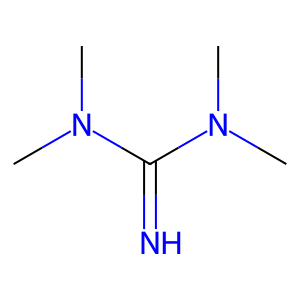

In [ ]:
molecule = "CN(C)C(=N)N(C)C"

# RDKit takes a Molecule as an input and returns a two-dimensional figure:
mol = Chem.MolFromSmiles(molecule)
Chem.Draw.MolToImage(mol)

Now let's use these tools to visualize some of the molecules in our dataset.  The code block below displays the structure of the molecules in the rosw of our dataset corresponding to the specified index. Try changing the values in `idx_molecules` to visualize the structure of a few different molecules:

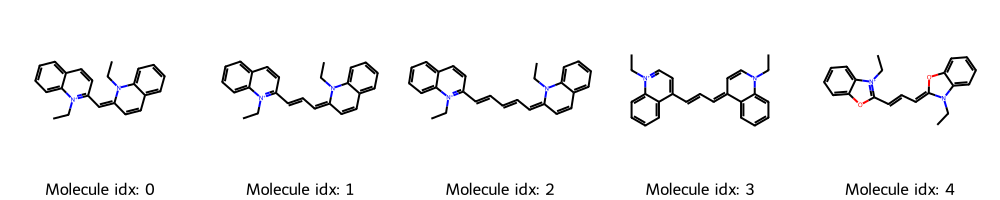

In [ ]:
# change the index values below to pick which structure to display
idx_molecules=[0, 1, 2, 3, 4]

# get the SMILES strings
molecules = dataset.iloc[idx_molecules,0].values
molecules = [Chem.MolFromSmiles(smiles) for smiles in molecules]
# display the molecular structures
img1=Chem.Draw.MolsToGridImage(molecules,molsPerRow=5,subImgSize=(200,200), legends=[f'Molecule idx: {idx}' for idx in idx_molecules])
img1

###Handling Data with Outliers

Sometimes removing outliers from the dataset can help improve model performance. Outliers are data points that differ drastically from the rest of the observations. Machine Learning models generalize from training data to make predictions; if they learn from data with extreme outliers, they may perform worse.

* [Wikipedia](https://en.wikipedia.org/wiki/Outlier)

It is always useful to identify possible outliers by charting a Histogram of the data

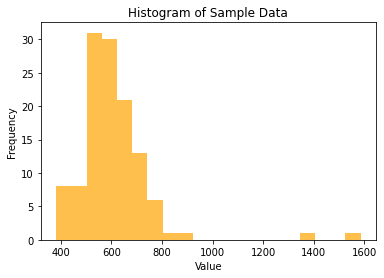

In [ ]:
plt.hist(dataset["MaxAbsorbanceWavelength"], bins=20, alpha=0.7,color='orange')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')
plt.show()

Specifically, for our exercise, we will only consider the observations where the `MaxAbsorbanceWavelength` is in the 90% quantile or below. This way, we will avoid extreme data points in our studied variable.

*Quantile*: If we divide the whole data distribution into equal-sized, ordered cuts, the quantiles represent the corresponding subgroups. Let's imagine our variable goes from 1 to 10; if we state we want to keep the quantile 90%, we will only study the data points where the variable is between 1 and 9.

In [ ]:
# Remove outliers
dataset = dataset[dataset['MaxAbsorbanceWavelength'] <= np.quantile(dataset['MaxAbsorbanceWavelength'], 0.90)]

### Identifying Dependent (y) and Independent Variables (X)

Next we need to split our dataset into dependent and independent variables. An independent variable does not depend on other variables, whereas a dependent variable is affected by independent variables and changes accordingly. Independent and dependent variables are commonly indicated as X and y:

- X is an array of independent variables 
- y is a dependent variable

In regression analysis, the dependent variables that we want to predict is referred to as a target value. In our dataset, `MaxAbsorbanceWavelength` is the target value (i.e., the dependent variable, y), and the 13 features are the independent variables (i.e., X). We will omit the non-numerical variables in our dataset (the *SMILES* and *InChIKey* molecular identifiers).

In [ ]:
X = dataset.iloc[:,0:-1] # Independent columns
X.drop(['SMILES', 'InChIKey'], axis=1, inplace=True) # Eliminate non-numerical features
y = dataset.iloc[:,-1] # Target column (MaxAbsorbanceWavelength)

### Split Train & Test Data

We will use most of our dataset to train our regression models; this portion is the "training" dataset. To evaluate model performance, however, we will need a test data set.  We will randomly split our data into a training and test set using the `train_test_split` module of `sklearn` library.

We will randomly split our data into a training and test set using `train_test_split` module of `sklearn` library. By default this function does an 80/20% split with a random shuffle of the items.  (Note that because this train/test split is random, you will find that the regression results vary each time you run the notebook.)

In [ ]:
# split our dataset into two sets: training dataset and test dataset, keeping 20% of the data for testing
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size =0.20,random_state = 24)

In [ ]:
# display Xtrain set
Xtrain.head()

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
17,3,2,6,0.047619,8,0,3,408.411,16,101.113002,11.008445,11,2
44,3,0,2,0.148148,3,2,6,395.526,15,720.045563,20.582387,16,8
16,3,0,2,0.148148,3,2,6,411.594,15,1422.086024,20.768834,17,8
47,3,0,3,0.160000,4,2,6,401.555,14,1477.259994,19.631370,16,8
52,3,0,2,0.173913,3,2,4,359.518,13,382.320300,16.149880,14,4


In [ ]:
# display Xtest set
Xtest.head()

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
10,3,0,3,0.160000,4,2,6,417.623,14,1280.653595,18.702037,17,8
27,4,2,6,0.162162,11,0,10,684.860,20,697.601591,18.243673,10,2
45,3,0,3,0.148148,4,2,7,427.593,15,808.590566,22.762971,18,10
54,3,0,2,0.160000,3,2,5,385.556,14,808.772393,17.618863,15,6
35,3,0,3,0.160000,4,2,6,401.555,14,1472.484482,20.722401,16,8


### Data Scaling
Notice that our features span a wide range of different values, from less than 1 to greater than 100. Many machine learning models perform better when the variables are on the same scale, so it's usually a good practice to rescale features before performing the analysis.

*   [Feature scaling](https://en.wikipedia.org/wiki/Feature_scaling)

There are many methods that can be used to scale data. Two approaches are:

*   Scaling: Scale our features in a specified range (e.g., between 0 and 1) without altering the distribution shape; for example, [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).
*   Normalizing: Scale our features, usually altering the distribution shape. Some techniques are [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standard%20scaler#sklearn-preprocessing-standardscaler) and [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html?highlight=robust%20scaler#sklearn-preprocessing-robustscaler).

For this analysis, let's scale all of our features to range between 0 and 1, based on the minimum and maximum of the training set. The functions `MinMaxScaler`, defined below, accomplish this task. You do not need to modify these functions.

In [ ]:
# import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# We begin by determining the maximum and minimum of each feature:
XtrainScaled = scaler.fit_transform(Xtrain)

Then we can apply this to transform the training and test sets to have input features between 0 and 1.  (**Be careful**,  as this will replace the values in these datasets with the rescaled versions. **You should only run this code once**. If you accidentally run it twice, go back and regenerate the training and test sets in the section [Split Train & Test Data](#scrollTo=-podlq9jlLSU&line=5&uniqifier=1).

In [ ]:
XtestScaled = scaler.transform(Xtest)
Xtrain = pd.DataFrame(XtrainScaled, index=Xtrain.index, columns= Xtrain.columns)
Xtest = pd.DataFrame(XtestScaled, index=Xtest.index, columns= Xtest.columns)

In [ ]:
# Visualize the first few as an example
Xtrain.head()

,AromaticRingCount,HBondDonorCount,HBondAcceptorCount,FractionCarbonSP3,HeteroatomCount,HeterocycleCount,RotatableBondCount,MolecularMass,DegreeOfUnsaturation,MinEllipsoidLength,MaxDistance,LongestPiChain,LinkerLength
17,0.25,0.333333,0.357143,0.081905,0.333333,0.0,0.136364,0.163398,0.277778,0.000221,0.000000,0.333333,0.2
44,0.25,0.000000,0.071429,0.254815,0.055556,0.4,0.272727,0.142968,0.222222,0.036123,0.571302,0.750000,0.8
16,0.25,0.000000,0.071429,0.254815,0.055556,0.4,0.272727,0.168445,0.222222,0.076844,0.582428,0.833333,0.8
47,0.25,0.000000,0.142857,0.275200,0.111111,0.4,0.272727,0.152527,0.166667,0.080045,0.514552,0.750000,0.8
52,0.25,0.000000,0.071429,0.299130,0.055556,0.4,0.181818,0.085875,0.111111,0.016533,0.306803,0.583333,0.4


Note that none of the feature values in the training dataset are smaller than 0 or greater than 1 now.

## Building Regression Models

Regression analysis is a process of explaining and defining the relationship between dependent and independent variables. In this activity, we will train several regression models to predict our target value, `MaxAbsorbanceWavelength` (in [this section](#scrollTo=8XeaNuO5Dble&line=3&uniqifier=1) and later in the [Penalized Regression](#scrollTo=QvWQHytwEeb6&line=1&uniqifier=1) and [Tree Models](#scrollTo=COTNAsOkGdXF) sections). We will use different metrics to evaluate how well the models perform (in the [Model Evaluation](#scrollTo=4i7by65Xx4gX) section). By choosing better independent variables (in the [Feature Selection](#scrollTo=B-I9vEAo8fJf) section) we can try to improve our model performance. Finally, we can interpret our models and gain insight into what features are important (in the [Feature Importance](#scrollTo=q8ulRc1uJ6kd&line=1&uniqifier=1) section).

### Simple Linear Regression
Let's start with the most basic type of regression model. **Simple linear regression** is a method that tries to define the relationship between two variables, the dependent variable and a single independent variable.

*   [Simple Linear Regression](https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf)
*   [Wikipedia](https://en.wikipedia.org/wiki/Simple_linear_regression)
*   [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html)

This relationship can be represented with a well-fitted line that follows:
$$
\hat{Y}=β_0+β_1X
$$
where:
* $β_0$: $y$ intercept
* $β_1$: slope (called the coefficient or weight in this context)

The optimal slope is generally determined by minimizing the residual sum of squares ([RSS](https://en.wikipedia.org/wiki/Residual_sum_of_squares)), which is given by:

$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

where $y_i$ are the actual values and $\hat{y}_i$ are the model predictions. This approached is referred to as the ordinary least squares ([OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares)) method.  You can read more about these methods at the following links:

Now that we know how a simple linear regression model works, let's train our first machine learning model by selecting one feature from our set of independent variables and plotting the line that best describes the relationship between our selected feature and the dependent variable (Max Absorbance Wavelength).

Let's start by choosing the `FractionCarbonSP3` feature and seeing how well it predicts the `MaxAbsorbanceWavelength`. Run the code block below to select the feature, extract the training and testing data for that feature, and train the regression model. (Note that to run a simple linear regression with another feature, you can simply copy this code block and change the `featureName` variable.)

In [ ]:
# Function to plot a scatter graph to show the predictions
# results - 'ytrue' value vs 'y_pred' value
def ResultsScatterPlot(predictions, title):
  x = np.linspace(0,1000,100)
  y = x
  fig, ax = plt.subplots()
  plt.plot(x, y, '-b')
  plt.scatter(predictions, ytest, color = 'limegreen')
  plt.errorbar(predictions, ytest, yerr=[(ytest - predictions), np.zeros(len(ytest))], fmt='.', ecolor='red')
  # axis labels
  plt.xlabel("Predicted value")
  plt.ylabel("Actual Value")
  plt.title(title)
  plt.show()

In [ ]:
# select a single feature
featureName = 'FractionCarbonSP3'

# Save the training and test data for that feature in the corresponding association variables
single_feature_lr_X_train = np.reshape(Xtrain[featureName].values, (-1,1))
single_feature_lr_X_test = np.reshape(Xtest[featureName].values, (-1,1))

# Train a simple linear regression for that feature and save it to the association variable
regressor = LinearRegression()
regressor.fit(single_feature_lr_X_train, ytrain)

LinearRegression()

Now that we've trained the model performance with the training dataset, let's use this model to predict MaxAbsorbanceWavelength for the test dataset and compare our predicted wavelengths to the true values. This is the real test of the model's performance.

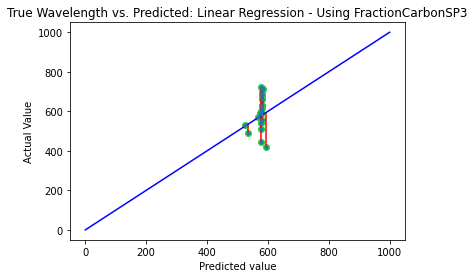

In [ ]:
# predicting the test set results
y_pred_simple_lr = regressor.predict(single_feature_lr_X_test)

# Plotting Scatter graph to show the prediction
title = f"True Wavelength vs. Predicted: Linear Regression - Using {featureName}"
ResultsScatterPlot(y_pred_simple_lr, title)

The graph above plots the actual wavelength vs. the predicted wavelength for the training data. If the model predictions were perfect, all the blue dots would lie along the dashed line. As we saw, this model is not perfect. There are quantitative ways that we can evaluate the performance of the model, which we'll discuss soon.

It can also be useful to examine the correlation between the feature used to the train the regression model and the target value. Let's plot the actual MaxAbsorbanceWavelength as a function of the value of FractionCarbonSP3.

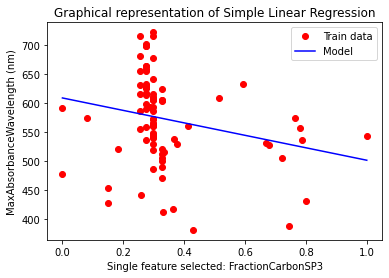

In [ ]:
# Plot a graphical representation
plt.plot(single_feature_lr_X_train, ytrain, 'o', color='red')
plt.plot(np.linspace(min(single_feature_lr_X_train), max(single_feature_lr_X_train),100), 
         regressor.intercept_+regressor.coef_ * np.linspace(min(single_feature_lr_X_train), max(single_feature_lr_X_train),100),
         color='b')
plt.xlabel('Single feature selected: {}'.format(featureName))
plt.ylabel("MaxAbsorbanceWavelength (nm)")
plt.legend(['Train data', 'Model'])
plt.title('Graphical representation of Simple Linear Regression');

If FractionCarbonSP3 could explain all the variation in MaxAbsorbanceWavelength, the red dots would lie along the blue line. Again we can see that the regression model is not perfect. In particular, many data points have FractionCarbonSP3 $\approx$ 0.4 but very different MaxAbsorbanceWavelength values.

For now, go back to the description of the different molecular features in our dataset. Use your chemical intuition and think about which ones might be correlated with MaxAbsorbanceWavelength. Then write new code to perform and visualize a linear regression for a different variable. (Hint: you can copy the code blocks above and modify them to choose a different feature and save a new model. Name the variables singleFeatureTrain2, singleFeatureTest2, and regressor2 to avoid overwriting the previous model.)

**ADD A CODE BLOCK HERE TO PERFORM A SIMPLE LINEAR REGRESSION FOR A DIFFERENT VARIABLE**

### Multiple Regression

When we have more than one independent variable in our dataset, we can make use of a **multiple regression model**. A multiple regression model can perform better at predicting the value of a dependent variable since the model has more information to use.

*   [Wikipedia](https://en.wikipedia.org/wiki/Linear_regression#Simple_and_multiple_linear_regression)

The formula is an extension of the single-variable simple linear regression:
$$
\hat{Y}=β_0+β_1X_1+β_2X_2+...+β_kX_k
$$
where:
  * $β_0$: $y$ intercept
  * $β_k$: slope corresponding to the k<sup>th</sup> feature
  * $k$: Number of independent feature our model uses.

As for the simple linear regression, the optimal slopes are determined by minimizing the RSS.

Now let's perform a multiple linear regression using all 13 molecular features and plot the actual vs. predicted wavelength:

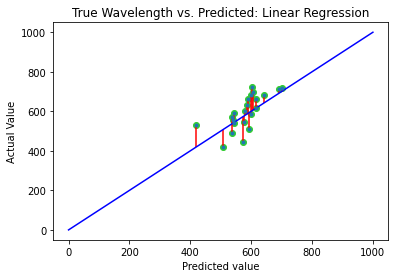

In [ ]:
# fit our linear reggression model
regressor_mr = LinearRegression()
regressor_mr.fit(Xtrain, ytrain)
# predicting the test set results
y_pred_lr = regressor_mr.predict(Xtest)

# Plotting Scatter graph to show the prediction
title = "True Wavelength vs. Predicted: Linear Regression"
ResultsScatterPlot(y_pred_lr, title)

As for the single-variable case, perfect model performance would be indicated by all the blue dots lying along the dashed line. Although this model isn't perfect, its performance looks qualitatively better than the FractionCarbonSP3 simple linear regression, and the predicted wavelengths span a wider range of values. Thus we can see that providing the model with more information improved the performance, as expected.

## Model Evaluation

By plotting predicted vs. actual wavelength, we could make a qualitative assessment of model performance. But how can we quantify the performance of a particular model, or quantitatively compare two different models? To do this, we can evaluate performance metrics using our test data.

Let's consider the following four metrics to quantify the agreement between our model predictions ($\hat{y}_i$) and the actual values ($y_i$):

- Mean Absolute Error (MAE): MAE is the average of the absolute difference between the actual value $y$ and the predicted value $\hat{y}$. The lower the error, the better the model performance.
$$
MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
$$
  Where:
  * $n$: number of data points/observations
  * $y_i$: actual value
  * $\hat{y}_i$: predicted value

  [Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)

- Mean Squared Error (MSE): MSE is the average of the squared difference between the actual and predicted values. As before, the lower the error, the better the model performance. MSE is one of the most used metrics for this kind of model.
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$
  [Wikipedia](https://en.wikipedia.org/wiki/Mean_squared_error)

- Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. As before, the lower the error, the better the model performance. It is conceptually similar to the standard deviation.
$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}
$$
  [Wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

- Coefficient of determination ($R^2$): $R^2$ reports how well the model is fitted to the data by comparing it to the average line of the dependent variable. In other words, it measures the degree to which the model explains the variability of the observed data. For example, a coefficient of determination of 80% indicates that the regression model explains 80% of the variability seen in the dependent variable.

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}
$$
&nbsp;&nbsp;&nbsp;&nbsp;[Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)


Although these quantitative metrics are informative, it is a good practice to see how the data behave with our own eyes through data visualization. Sometimes a single number or metric cannot explain the whole picture, or can even be misleading. [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) is a famous illustration of that point.

We can request a single property using the code below:

In [ ]:
print(f"MAE: {mean_absolute_error(ytest, y_pred_simple_lr)}")

MAE: 71.08172462744257


Let's make life easy by defining a convenience function that takes the model and a test set and calculates our four metrics of interest:

In [ ]:
# One single function for all metrics
def ModelEvaluation(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred)**(1/2)
  r2 = r2_score(y_true, y_pred)
  return {'MAE': mae,'MSE': mse,'RMSE': rmse, 'R2': r2}

Now we can store these results in a variable called metrics and add the results for the simple linear regression and multiple regression models.

In [ ]:
# Calculate the performance metrics for the FractionCarbonSP3 simple linear regression using the corresponding single - variable test data
metrics_simple_lr = ModelEvaluation(ytest, y_pred_simple_lr)

# Calculate the performance metrics for the multiple regression using the full test data
metrics_multiple_lr = ModelEvaluation(ytest, y_pred_lr)

In [ ]:
# turn our metric results into a pandas dataset
pd.DataFrame({f'Simple Linear Regression: {featureName}':metrics_simple_lr,
              'Multiple Regression': metrics_multiple_lr})

,Simple Linear Regression: FractionCarbonSP3,Multiple Regression
MAE,71.081725,53.078816
MSE,7670.736742,4257.284000
RMSE,87.582742,65.247866
R2,-0.012242,0.438202


When we compare the `FractionCarbonSP3` simple linear regression and the multiple regression, we can see that **multiple regression** works better according to both the eye test and the quantitative performance metrics.

Now add a code block below to calculate these performance metrics for a simple linear regression with the single feature that you tested above, add them to the metrics variable, and display the results in table. How did your new model perform?

**ADD A CODE BLOCK HERE TO CALCULATE THE PERFORMANCE METRICS FOR A SIMPLE LINEAR REGRESSION USING A DIFFERENT VARIABLE AND ADD THEM TO THE METRICS TABLE**

##Avoiding Model Overfitting

Overfitting refers to a situation when a model has become too specific to the training data and fails to generalize well to new test data. Overfitting generally occurs when there are too many variables in the model compared to the number of observations (i.e., the model is overly complicated and/or the training set is too small).

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#The-Bias-variance-trade-off)
* [Wikipedia](https://en.wikipedia.org/wiki/Overfitting)
* [Scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html) documentation

There are a few ways to avoid overfitting. We'll try two approaches here:


1.   Identifying the best correlated feature(s)
2.   Using a penalized regression model

## Feature Selection

Feature selection entails choosing better features for the model by eliminating some of the available independent variables. Reducing the number of features can help the algorithm perform better by eliminating misleading variables or preventing overfitting. For an overview, see the following article:

* [Wikipedia](https://en.wikipedia.org/wiki/Feature_selection)

To identify appropriate features for our model, let's use the Pearson Correlation technique.



### Pearson Correlation

The Pearson Correlation Coefficient is one way to determine what values are relevant for our machine learning model. This value ranges from -1 to 1 and can be interpreted as follows:

- If the value is exactly 0, it means no correlation at all
- If value if closer to 0, it means weaker correlation. 
- If the value is closer to 1, it means stronger positive correlation
- If the value is closer to -1, it means stronger negative correlation

We are only concerned about the absolute value of the correlation as the direction is not relevant for this exercise.

For more information on correlation, see:
*   [Wikipedia](https://en.wikipedia.org/wiki/Correlation)

Let's calculate the Pearson Correlation Coefficient for all 13 features in our dataset, then perform the calculation:

In [ ]:
# Get pearson Correlation between all features
P_correlation = pd.DataFrame(Xtrain.merge(ytrain, right_index=True, left_index=True).corr()['MaxAbsorbanceWavelength'].dropna())

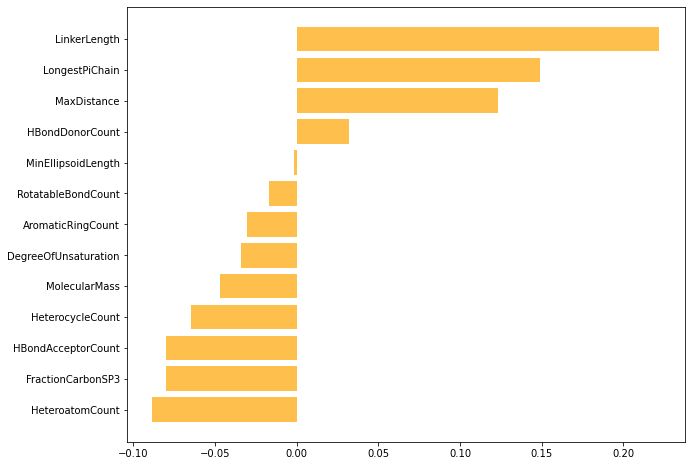

In [ ]:
# Display the absolute correlation scores
P_corr = P_correlation.sort_values(by='MaxAbsorbanceWavelength', ascending=True)[:-1]
corr_features = P_corr.index
y_pos = np.arange(len(corr_features))
corr_values = np.squeeze(P_corr.values)

plt.figure(figsize=(10,8))
plt.barh(corr_features, corr_values, alpha=0.7,color='orange');

Think about which features show strong positive or negative correlations. Does your chemical intuition say that any of these properties might be physically meaningful in determining cyanine dye absorption?

In [ ]:
# Get the absolute value of the correlation scores
P_correlation_abs = np.abs(P_correlation).sort_values(by='MaxAbsorbanceWavelength', ascending=False)[1:]
P_correlation_abs.columns = ['MaxAbsorbanceWavelength Correlation']
# Display the absolute correlation scores
P_correlation_abs.style.background_gradient(cmap ='RdYlBu')

,MaxAbsorbanceWavelength Correlation
LinkerLength,0.221925
LongestPiChain,0.148666
MaxDistance,0.123352
HeteroatomCount,0.088383
FractionCarbonSP3,0.079991
HBondAcceptorCount,0.079728
HeterocycleCount,0.064544
MolecularMass,0.046567
DegreeOfUnsaturation,0.033923
HBondDonorCount,0.031919


### Applying Pearson Correlation

Now let's try training a simple linear regression model using only the feature with the highest correlation. Add code blocks below to train the model, plot the predicted vs. actual wavelengths, and generate performance metrics. (Hint: as before, you can do this by copying and modify code blocks from above.) How do the results compare to your previous simple linear regression models?

**ADD A CODE BLOCK TO PERFORM A SIMPLE LINEAR REGRESSION FOR A SINGLE HIGHLY CORRELATED VARIABLE, PLOT THE RESULTS, AND CALCULATE PERFORMANCE METRICS**

## Regularized (or Penalized) Regression

Another approach we can take to prevent overfitting is adding a tuning parameter (regularization) that penalizes model complexity. In other words, this penalty tends to keep the model coefficients smaller and minimizes the effect of extreme values in the training dataset. These types of models are referred to as regularized or penalized regression.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Regularization)
* [Wikipedia](https://en.wikipedia.org/wiki/Regularization_(mathematics))

There are several types of regularization penalties that can be applied. Let' s test two different types of regularized regression models:

1.   Ridge Regression (a.k.a. L2 regularization)
2.   Lasso Regression (a.k.a. L1 regularization)



### Ridge Regression

**Ridge Regression** uses a penalty given by a regularization parameter (which we'll call alpha) multiplied by the sum of the squared model coefficients:
$$
P = \alpha\sum_{i=1}^{k}\beta_i^{2}
$$

This penalty is then added to the normal RSS term. Addition of this penalty term has the effect of shrinking the model coefficients, helping to reduce model complexity and prevent overfitting.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Ridge-regression-($L_2$-Regularization))
* [Wikipedia](https://en.wikipedia.org/wiki/Ridge_regression)
* [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation

Let's look how Ridge Regression performs using all the features. Note that you can tune the weight of the penalty by adjusting the alphaValueRidge variable in the code below. Reducing alpha to 0 makes the penalty 0 and turns this model back into a normal multiple regression.

Run the code block below perform Ridge Regression analysis. (Start with the default value of alpha, but later you can test how changing alpha affects the results.)

In [ ]:
# set the alpha value
alphaValueRidge = 1

# train a Ridge Regression model
rid_regressor = Ridge(alpha=alphaValueRidge)
rid_regressor.fit(Xtrain, ytrain)
y_pred_rid = rid_regressor.predict(Xtest)

# calculate ridge metrics
metrics_ridge = ModelEvaluation(ytest, y_pred_rid)
# create a DataFrame containing ridge metrics
pd.DataFrame({'Ridge':metrics_ridge}).transpose()

,MAE,MSE,R2,RMSE
Ridge,54.086566,4171.636534,0.449505,64.588207


Now let's plot the actual vs. predicted wavelength  for the test dataset with the Ridge Regression model with `alphaValueRidge = 1`.

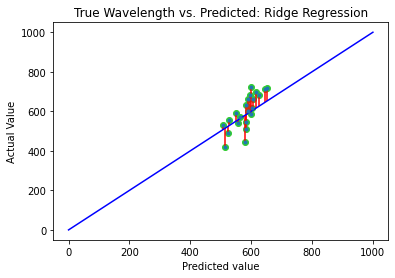

In [ ]:
# plot the predicted vs. true wavelength values
title = "True Wavelength vs. Predicted: Ridge Regression"
ResultsScatterPlot(y_pred_rid, title)

From the performance metrics, we can see that the Ridge Regression model performs slightly better than the the Multiple Linear Regression without a penalty in this case.

Now try tuning the value of alpha and see how it affects the results. Add a code block below to train new Ridge Regression models and test different values of alpha. (Hint: you will need to rename the variables `rid_regressor`, `y_pred_rid`, and `metrics_ridge` for each model):

1.   Test alpha = 0
2.   Test a few intermediate values of alpha

Calculate the performance metrics for each model and compare to the results for an unpenalized multiple linear regression and the Ridge Regression with the highest penalty (alpha = 1). Which model gives the best performance?

**ADD CODE BLOCKS HERE TO PERFORM RIDGE REGRESSION ANALYSIS USING DIFFERENT VALUES OF ALPHA. ALSO PLOT THE RESULTS AND CALCULATE PERFORMANCE METRICS**

### Lasso Regression
**Lasso Regression** uses a penalty given by a regularization parameter (again we'll call it alpha) multiplied by the absolute value of the model coefficients:

$$
P = \alpha\sum_{i=1}^{k}|\beta_i|
$$

Like for Ridge regression, this penalty term is added to the RSS term and has the effect of shrinking the model coefficients.

* [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html#Lasso-regression-($L_1$-regularization))
* [Wikipedia](https://en.wikipedia.org/wiki/Lasso_(statistics))
* [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) documentation


The syntax for Lasso Regression is the same as for Ridge Regression, but substitute `Lasso(...)` for `Ridge(...)` in the code above. Try writing a code block to train a Lasso Regression model, plot the predicted vs. true wavelength, and calculate the performance metrics. Start with the maximum penalty value (alpha = 1) and then test a few different values, as you did for Ridge Regression.

**ADD A CODE BLOCK BELOW TO TRAIN A LASSO REGRESSION MODEL, PLOT THE RESULTS, AND CALCULATE PERFORMANCE METRICS. THEN DO THE SAME THING FOR A FEW DIFFERENT VALUES OF THE ALPHA PARAMETER.**

## Model Evaluation

Let's now review all the developed models to see which perform the best. (Remember that these results will vary each time you execute the notebook because of the random train/test split of the dataset.)

In [ ]:
# compile all the metrics
AllTheMetrics = {'Simple_LR': metrics_simple_lr,
                 'Multiple_LR': metrics_multiple_lr,
                 'Ridge (alpha = 1)': metrics_ridge,
                }
# create a DataFrame containing all the metrics
pd.DataFrame(AllTheMetrics).transpose().sort_values('MSE')

,MAE,MSE,RMSE,R2
Ridge (alpha = 1),54.086566,4171.636534,64.588207,0.449505
Multiple_LR,53.078816,4257.283998,65.247866,0.438202
Simple_LR,71.081725,7670.736741,87.582742,-0.012242


**MODIFY THE CODE BLOCK ABOVE TO ADD RESULTS FOR YOUR NEW MODELS:**
1.   SIMPLE LINEAR REGRESSION WITH THE BEST CORRELATED FEATURE
2.   RIDGE REGRESSION WITH ALPHA = 0
3.   RIDGE REGRESSION WITH THE BEST INTERMEDIATE VALUE OF ALPHA
4.   LASSO REGRESSION WITH ALPHA = 1
5.   LASSO REGRESSION WITH ALPHA = 0
6.   LASSO REGRESSION WITH THE BEST INTERMEDIATE VALUE OF ALPHA


Ensure that the table above includes all the models that you tested.

Although the model performance isn't perfect, you can see that choosing a well-correlated feature can give better results than a poorly-correlated feature, and that using a penalized regression model can often improve on the performance of an unpenalized multiple regression.

## Feature Importance
In addition to using a regression model to make quantitative predictions of our target value, we can also use it to gain insight into the system that we are studying. In other words, we can use regression models to generate hypotheses about what factors are important for cyanine dye absorption. One way to do this is to assess which of the independent variables make the largest contribute to determining the predicted result in our regression models. We refer to this property as feature importance.

### Feature Importance Using Coefficients

There is a simple approach for interpreting feature importance in linear regression models like the ones we've used so far. Coefficients with larger magnitudes correspond to features that are playing a larger role in the model. Run the code blocks below to plot the coefficients associated with each feature in the multiple regression model:

Run the code blocks below to plot the coefficients associated with each feature in the multiple regression model.

In [ ]:
feature_importance_lr = pd.DataFrame({'Feature':regressor_mr.feature_names_in_,
                                      'Coef': regressor_mr.coef_,
                                      'Abs Coef': np.abs(regressor_mr.coef_)})

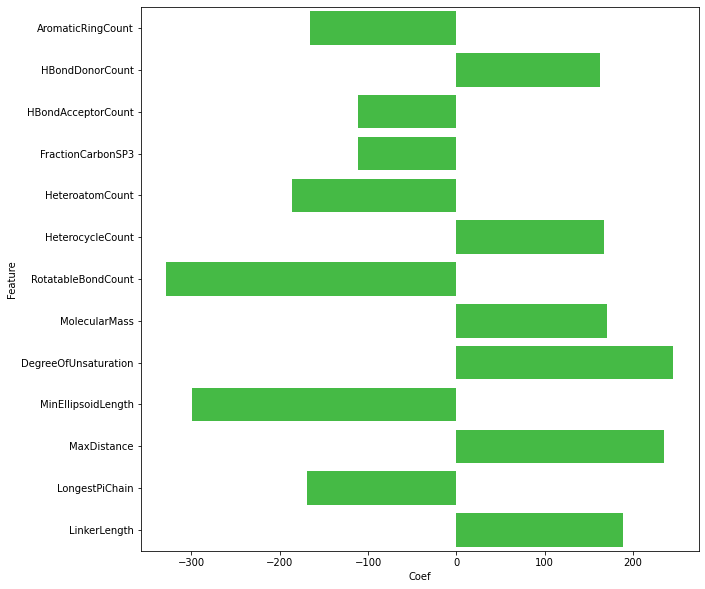

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data = feature_importance_lr, x='Coef', y='Feature', color='limegreen')

To make the results even clearer, we can sort by decreasing coefficient value.

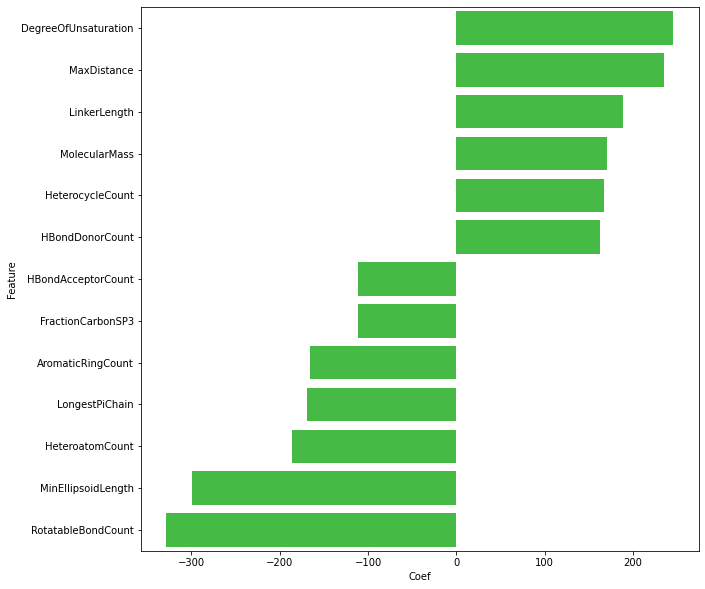

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.barplot(data = feature_importance_lr.sort_values("Coef",ascending=False), x='Coef', y='Feature', color='limegreen');

In [ ]:
feature_importance_lr = pd.DataFrame({'Feature':regressor_mr.feature_names_in_,
                                      'Coef': regressor_mr.coef_,
                                      'Abs Coef': np.abs(regressor_mr.coef_)})

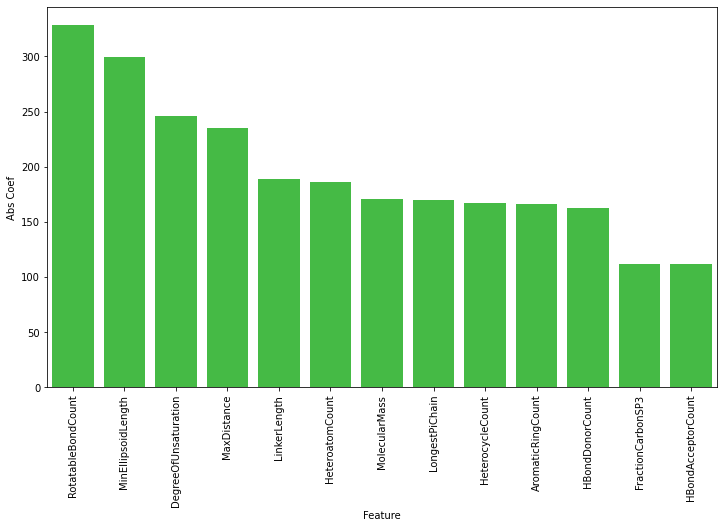

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.barplot(data = feature_importance_lr, x='Feature', y='Abs Coef', order=feature_importance_lr.sort_values('Abs Coef', ascending=False)['Feature'], color='limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

You might notice that the features with the highest weights are not the same as the features that were best correlated with the Calculated Absorbance according to the Pearson Correlation analysis. That discrepancy can arise because the Pearson Correlation analysis looks at the correlation between each independent variable and the dependent variable separately, whereas this analysis is looking at the contribution of each independent variable to the model that includes all 13 independent variables together.

Now let's look at the feature importance for the Ridge and Lasso Regression models. Modify the code blocks above to generate plots of the coefficients for each of those models.

**ADD A CODE BLOCK BELOW TO PLOT THE FEATURE COEFFICIENTS FOR THE RIDGE AND LASSO REGRESSION MODELS WITH ALPHA = 1**

## Gaining Insight from Regression Models

Look back at the results of all the regression models that you've trained so far. Also consider the Pearson Correlation analysis and the feature importance analysis.

None of these features can fully explain the differences in absorbance wavelength for all the cyanine dyes. But now, use your chemical intuition and try to generate a hypothesis that is grounded in quantum chemistry, using any insight that you can take from the regression models. (Hint: think about the quantum chemistry models that you've studied so far in your physical chemistry course.)

# Part II

## Feature Engineering

So far we've only considered the 13 features in our dataset. But we can also make combinations of these individual features to try to improve model performance. This process of creating new features from the ones we already have, either combining them or applying other operations, is called **feature engineering**.

*  [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.04-feature-engineering.html)
*  [Machine Learning Mastery](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/)
*  [Wikipedia](https://en.wikipedia.org/wiki/Feature_engineering)

As we saw in the [Get and Preprocess the Data section](#scrollTo=7LbxW6isKPpb&line=1&uniqifier=1), our tables are stored in Python variables. Given that our tables are saved in variables, we can experiment with them and then keep our changes in new variables or update the ones we have.

If we would like to create a new column using another one that we already have, we can simply state the name of the new column and what operation we want to apply by following the structure:

`table['new_column'] = table['column_1'] + table['column_2']`

or 

`table['new_column'] = table['column_1'] * table['column_2']`

or any other arithmetic operation.

**Example**: 

We are working with `grades` that contains all students' grades from class A, B, and C.

|Student | Class_A | Class_B| Class_C|
-----|-----|-----| -----|
|Student 1|91|95|78|
|Student 2|96|87|90|
|Student 3|79|89|92|
|Student 4|86|72|80|

We have been asked to determine the average grade for each student and store the result into a new feature called `Average_Grade`. To obtain this number, we can do the following:

`grades['Average_Grade'] = (grades['Class_A'] + grades['Class_B'] + grades['Class_C'])/3`

And consequently, we obtain the following result:

|Student | Class_A | Class_B| Class_C| Average_Grade|
-----|-----|-----|-----|-----|
|Student 1|91|95|78|88|
|Student 2|96|87|90|91|
|Student 3|79|89|92|87|
|Student 4|86|72|80|83|


In [ ]:
# Create a function that predicts and generates the metrics for our experiments
def predict_and_score(Train_data, Test_data, y_train, y_test):
  regressor = LinearRegression()
  regressor.fit(Train_data, y_train)
  # predicting the test set results
  y_pred = regressor.predict(Test_data)
  return pd.DataFrame({'Experiment': ModelEvaluation(y_test, y_pred)}).transpose()

Let's try making a new feature that is the product of the number of heteroatoms and the number of heterocycles in the molecules and then use that new feature in a model.

In [ ]:
# Example new feature #1: HeteroatomCount * HeterocycleCount
exp1_train = Xtrain.copy()
exp1_test = Xtest.copy()

# HACxHCC = HeteroatomCount * HeterocycleCount
exp1_train['HACxHCC'] = exp1_train['HeteroatomCount'] * exp1_train['HeterocycleCount']
exp1_test['HACxHCC'] = exp1_test['HeteroatomCount'] * exp1_test['HeterocycleCount']

Now repeat this process by combining two or more features of your choice (by addition, multiplication, subtraction, etc). For example, you could pick two of the features with highest correlation in the Pearson analysis, or you could pick two features that your chemical intuition says might be important. Add a code block below to generate a new feature.

**ADD A CODE BLOCK BELOW TO CREATE A NEW FEATURE BY COMBINING FEATURES FROM THE ORIGINAL DATASET**

Now try running simple linear regression analyses separately with HACxHCC and your new feature. You will need to go through the preprocessing data steps (separating x and y values, splitting, rescaling, etc) before performing the regression.

**ADD A CODE BLOCK BELOW TO REPEAT THE DATA PREPROCESSING, PERFORM A SIMPLE LINEAR REGRESSION FOR THE TWO NEW FEATURES, VISUALIZE THE RESULTS, AND CALCULATE PERFORMANCE METRICS**

How well did HACxHCC and your new feature perform?

## Tree Models

Tree models use a tree-like schema in order to make decisions.

The most common tree-based models for regression problems are:

1.   Decision Tree
2.   Random Forest

### Decision Tree Regression

The Decision Tree algorithm uses a single tree to make predictions. It models the data in a tree structure in which each leaf node leads to the prediction for the dependent variable. Although easy to implement, Decision Tree models can be prone to overfitting.

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)
- [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#regression) documentation

The code block below trains a Decision Tree model and visualizes the tree structure. Run this analysis, then add a code block to plot the predicted vs. actual wavelength and to calculate the performance metrics.

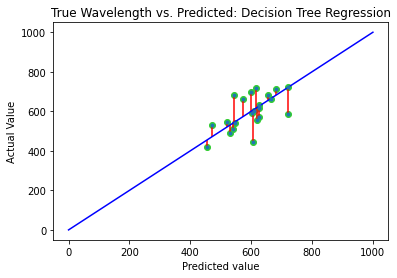

In [ ]:
# Import the DecisionTree module
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# Fit a DecisionTree model to the dataset
DTReg = DecisionTreeRegressor()
DTReg.fit(Xtrain, ytrain)
y_pred_DTReg = DTReg.predict(Xtest)

# plot the predicted vs. true wavelength values
title = "True Wavelength vs. Predicted: Decision Tree Regression"
ResultsScatterPlot(y_pred_DTReg, title)

Now add a code block to plot and store the performance metrics for the Decision Tree regression.

**ADD A CODE BLOCK HERE TO PLOT THE DECISION TREE RESULTS AND CALCULATE PERFORMANCE METRICS**

### Random Forest Regression

Random Forest builds a collection of Decision Trees, where each tree is trained with a random subset of training instances and a random subset of features. The final prediction is determined as the average output among the collection of trees. The Random Forest algorithm is less prone to overfitting data than the Decision Tree algorithm.

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html#Random-Forest-Regression)
- [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) documentation

The code block below trains a Random Forest model. Run this analysis, then add a code block to plot the predicted vs. actual wavelength and to calculate the performance metrics.

In [ ]:
# Import the RandomForestRegressor module
from sklearn.ensemble import RandomForestRegressor
# Fit a Random Forest model to the dataset
randomF = RandomForestRegressor(n_estimators = 200, random_state = 12)
randomF.fit(Xtrain, ytrain)
y_pred_rf = randomF.predict(Xtest)

**ADD A CODE BLOCK HERE TO PLOT THE RANDOM FOREST RESULTS AND CALCULATE PERFORMANCE METRICS**

How do the Random Forest and Decision Tree results compare to the models tested above? Add a code block below to make a new table of performance metrics that includes these models as well as all the models tested above. (Hint: you can copy and modify the table from the [Model Evaluation](#scrollTo=4i7by65Xx4gX) section.)

**ADD A CODE BLOCK HERE TO GENERATE A NEW TABLE WITH PERFORMANCE METRICS FOR ALL TESTED MODELS**

## Feature Importance Using SHapley Additive exPlanations (SHAP)

For the linear regression models above, we used the coefficients to determine which features were most important for the model. But for non-linear models, like DecisionTree or RandomForest, determining feature importance can be more difficult. There are a few model-specific approaches that can be used, but here we will use a general approach called SHapley Additive exPlanations (SHAP).

SHAP is a method derived from Game Theory (Economics) that brings interpretability to machine learning models, showing the contribution of each attribute in a model-agnostic way.

* [SHAP Documentation](https://shap.readthedocs.io/en/latest/index.html)
* [A Unified Approach to Interpreting Model Predictions (Paper)](https://arxiv.org/abs/1705.07874v2)

Run the code blocks below to import the SHAP module.

In [ ]:
# Run this if you do not have the shap library installed
!pip install -q shap 
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.3 MB/s eta 0:00:00


In [ ]:
shap.initjs()

### SHAP Analysis for Decision Tree Regression
Now let's try to understand our Decision Tree model using the SHAP approach. The code block below performs SHAP analysis on our Decision Tree model and displays a plot of feature importance:

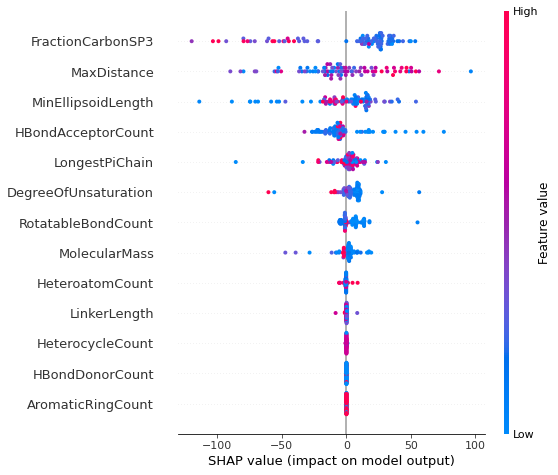

In [ ]:
# load SHAP analysis on our Decision Tree Model
explainer = shap.TreeExplainer(DTReg)
shap_values_DTReg = explainer.shap_values(Xtrain)

# plot SHAP graph
shap.summary_plot(shap_values_DTReg, Xtrain)

The plot above can be interpreted by looking at the distance from the Feature Impact = 0 line and the displayed color of each point. The distance from the 0 line reflects how much of an impact the feature had on the model for that particular data point. The displayed color shows whether the feature value was low/more negative (*blue*) or high/more positive (*red*) for that point. Features with points more distant from the 0 line were more important for the model. When points of the same color cluster on one side of the 0 line, it indicates that the feature value tended to shift the model prediction in a more consistent direction.

It can be simpler to omit the effect direction and just calculate the mean absolute SHAP value for each feature and display them in a bar plot.

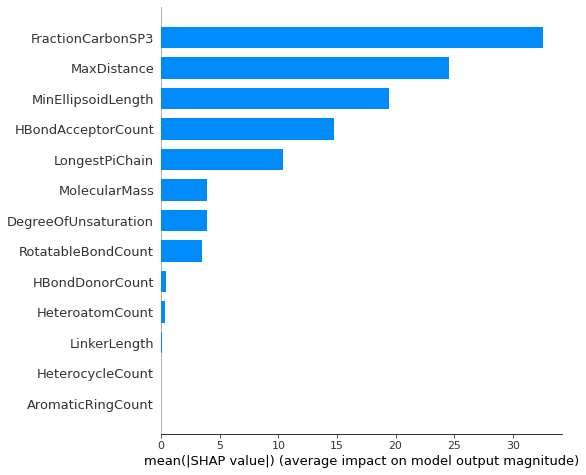

In [ ]:
# display SHAP in a barchart presenting the impact of each feature
shap.summary_plot(shap_values_DTReg, X, plot_type="bar")

### SHAP Analysis for Random Forest Regression
Now follow the same approach to interpret our Random Forest model using the SHAP approach. Add a code block below to perform SHAP analysis and plot the results.

**ADD A CODE BLOCK HERE TO PERFORM SHAP ANALYSIS FOR THE RANDOM FOREST MODEL AND GENERATE PLOTS OF FEATURE IMPORTANCE**

Are these tree models relying on the same features as the linear regression models above?

# Conclusion

This exercise is just one example of how machine learning regression analysis can be applied to chemistry. As you continue in your chemistry studies or research, look for other opportunities to make predictions or generate hypotheses using these types of models!